In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
pd.set_option("display.precision",2)
pd.set_option("display.max_column",10)

In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,...,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,...,13.7,3,3.70,1,False
2,NJ,137,415,No,No,...,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,...,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,...,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


In [6]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [7]:
df.describe(include=["integer","float"])

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,...,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,...,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,...,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,...,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,...,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,...,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,...,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,...,17.77,20.00,20.00,5.40,9.00


In [8]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [9]:
df['Churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: Churn, dtype: float64

In [10]:
df.sort_values(by = 'Total day charge',ascending = False).head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,...,10.1,9,2.73,1,True
985,NY,64,415,Yes,No,...,13.3,9,3.59,1,True
2594,OH,115,510,Yes,No,...,11.8,8,3.19,1,True
156,OH,83,415,No,No,...,15.8,7,4.27,0,True
605,MO,112,415,No,No,...,12.7,8,3.43,2,True


In [11]:
df[['Churn','Total day charge']].sort_values(by = 'Churn',ascending = True).head(20)

,Churn,Total day charge
0,False,45.07
2117,False,37.77
2120,False,26.27
2121,False,15.37
2122,False,45.70
2123,False,18.04
2124,False,4.59
2125,False,23.82
2126,False,41.65
2127,False,33.44


In [12]:
df[['Churn','Total day charge']].sort_values(by = ['Churn','Total day charge'],ascending = [True,False]).head(20)

,Churn,Total day charge
688,False,53.65
2259,False,53.35
534,False,52.77
575,False,52.68
2858,False,52.36
1165,False,52.21
3207,False,52.05
2478,False,51.88
1355,False,51.46
1830,False,51.29


In [13]:
df_tmp = pd.DataFrame({
    'a':[1,2,4,2,4,6,34,2],
    'b':[4,2,6,3,2,7,4,2]              
                  })
df_tmp

,a,b
0,1,4
1,2,2
2,4,6
3,2,3
4,4,2
5,6,7
6,34,4
7,2,2


In [14]:
df_tmp.sort_values(by = 'a',ascending = False)

,a,b
6,34,4
5,6,7
2,4,6
4,4,2
1,2,2
3,2,3
7,2,2
0,1,4


In [15]:
df_tmp.sort_values(by = ['a','b'],ascending = [False,False])

,a,b
6,34,4
5,6,7
2,4,6
4,4,2
3,2,3
1,2,2
7,2,2
0,1,4


In [16]:
df['Churn'].mean()

0.14491449144914492

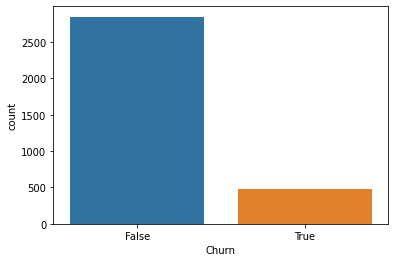

In [17]:
sns.countplot(x=df['Churn'])
pl.show()

In [18]:
its = [1 if i == True else 0 for i in df['Churn'].values]

<AxesSubplot:ylabel='count'>

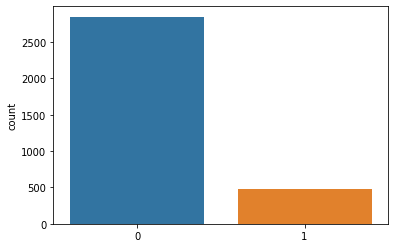

In [19]:
sns.countplot(x=its)


In [20]:
sum(its)/len(its)

0.14491449144914492

In [21]:
pd.DataFrame(df[df['Churn']==1].mean()).reset_index().rename(columns = {
    'index':'column',0:'mean'
})

C:\Users\risha\AppData\Local\Temp/ipykernel_1516/143033459.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame(df[df['Churn']==1].mean()).reset_index().rename(columns = {


,column,mean
0,Account length,102.66
1,Area code,437.82
2,Number vmail messages,5.12
3,Total day minutes,206.91
4,Total day calls,101.34
5,Total day charge,35.18
6,Total eve minutes,212.41
7,Total eve calls,100.56
8,Total eve charge,18.05
9,Total night minutes,205.23


In [22]:
df[df['Churn']==1]['Total day minutes'].head()

10    129.1
15    332.9
21     62.4
33    249.6
41    173.1
Name: Total day minutes, dtype: float64

In [23]:
df[(df['Churn']==0)&(df['International plan']=='No')]['Total intl minutes'].head()

0    10.0
1    13.7
2    12.2
6     7.5
8     8.7
Name: Total intl minutes, dtype: float64

In [24]:
df.loc[0:5,"State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [25]:
df.iloc[0:5,0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [26]:
df[-10:]

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,...,13.6,3,3.67,5,True
3324,WV,159,415,No,No,...,11.6,4,3.13,1,False
3325,OH,78,408,No,No,...,9.3,4,2.51,2,False
3326,OH,96,415,No,No,...,14.9,7,4.02,1,False
3327,SC,79,415,No,No,...,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,...,9.9,6,2.67,2,False
3329,WV,68,415,No,No,...,9.6,4,2.59,3,False
3330,RI,28,510,No,No,...,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,...,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,...,13.7,4,3.70,0,False


In [27]:
df.iloc[::-1,::-2].head()

,Churn,Total intl charge,Total intl minutes,Total night calls,Total eve charge,Total eve minutes,Total day calls,Number vmail messages,International plan,Account length
3332,False,3.70,13.7,77,22.60,265.9,113,25,No,74
3331,False,1.35,5.0,137,13.57,159.6,105,0,Yes,184
3330,False,3.81,14.1,91,24.55,288.8,109,0,No,28
3329,False,2.59,9.6,123,13.04,153.4,57,0,No,68
3328,False,2.67,9.9,83,18.32,215.5,77,36,No,192


In [28]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                      True
dtype: object

In [29]:
df.apply('count')

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [30]:
df.apply(len)

State                     3333
Account length            3333
Area code                 3333
International plan        3333
Voice mail plan           3333
Number vmail messages     3333
Total day minutes         3333
Total day calls           3333
Total day charge          3333
Total eve minutes         3333
Total eve calls           3333
Total eve charge          3333
Total night minutes       3333
Total night calls         3333
Total night charge        3333
Total intl minutes        3333
Total intl calls          3333
Total intl charge         3333
Customer service calls    3333
Churn                     3333
dtype: int64

In [31]:
df.apply([min,max]).T

,min,max
State,AK,WY
Account length,1,243
Area code,408,510
International plan,No,Yes
Voice mail plan,No,Yes
Number vmail messages,0,51
Total day minutes,0.0,350.8
Total day calls,0,165
Total day charge,0.0,59.64
Total eve minutes,0.0,363.7


In [32]:
df.head(20)

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,...,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,...,13.7,3,3.70,1,False
2,NJ,137,415,No,No,...,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,...,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,...,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,...,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,...,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,...,7.1,6,1.92,0,False
8,LA,117,408,No,No,...,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,...,11.2,5,3.02,0,False


In [33]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,...,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,...,9.5,3,2.57,0,False
44,WI,64,510,No,No,...,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,...,11.0,3,2.97,1,False
54,WY,87,415,No,No,...,9.7,3,2.62,5,True


In [34]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,...,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,...,13.7,3,3.70,1,False
2,NJ,137,415,False,No,...,12.2,5,3.29,0,False
3,OH,84,408,True,No,...,6.6,7,1.78,2,False
4,OK,75,415,True,No,...,10.1,3,2.73,3,False


In [35]:
d = {"No": False, "Yes": True}
df["Voice mail plan"] = df["Voice mail plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,...,10.0,3,2.70,1,False
1,OH,107,415,False,True,...,13.7,3,3.70,1,False
2,NJ,137,415,False,False,...,12.2,5,3.29,0,False
3,OH,84,408,True,False,...,6.6,7,1.78,2,False
4,OK,75,415,True,False,...,10.1,3,2.73,3,False


In [36]:
df = df.replace({"Voice mail plan": d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,...,10.0,3,2.70,1,False
1,OH,107,415,False,True,...,13.7,3,3.70,1,False
2,NJ,137,415,False,False,...,12.2,5,3.29,0,False
3,OH,84,408,True,False,...,6.6,7,1.78,2,False
4,OK,75,415,True,False,...,10.1,3,2.73,3,False


In [37]:
columns_to_show = ["Total day minutes","Total eve minutes","Total night minutes"]
df.groupby(["Churn"])[columns_to_show].describe(percentiles = []).T

Churn                        False    True
Total day minutes   count  2850.00  483.00
                    mean    175.18  206.91
                    std      50.18   69.00
                    min       0.00    0.00
                    50%     177.20  217.60
                    max     315.60  350.80
Total eve minutes   count  2850.00  483.00
                    mean    199.04  212.41
                    std      50.29   51.73
                    min       0.00   70.90
                    50%     199.60  211.30
                    max     361.80  363.70
Total night minutes count  2850.00  483.00
                    mean    200.13  205.23
                    std      51.11   47.13
                    min      23.20   47.40
                    50%     200.25  204.80
                    max     395.00  354.90

In [38]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[columns_to_show].agg([np.mean,np.std,np.min,np.max]).T

Churn                      False    True
Total day minutes   mean  175.18  206.91
                    std    50.18   69.00
                    amin    0.00    0.00
                    amax  315.60  350.80
Total eve minutes   mean  199.04  212.41
                    std    50.29   51.73
                    amin    0.00   70.90
                    amax  361.80  363.70
Total night minutes mean  200.13  205.23
                    std    51.11   47.13
                    amin   23.20   47.40
                    amax  395.00  354.90

In [39]:
pd.crosstab(df['Churn'],df['International plan'])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [40]:
df.groupby('Churn')['International plan'].count()

Churn
False    2850
True      483
Name: International plan, dtype: int64

In [41]:
2850-2664

186

In [42]:
483-346

137

In [43]:
pd.crosstab(df["Churn"], df["International plan"],normalize=True)

International plan,False,True
Churn,,
False,0.8,0.06
True,0.1,0.04


In [44]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)


Voice mail plan,False,True
Churn,,
False,0.60,0.25
True,0.12,0.02


In [45]:
df.pivot_table(
    values = ["Total day calls", "Total eve calls", "Total night calls"],
    index = ["Area code"],
    columns=["Churn"],
    aggfunc="mean",
)

Total day calls         Total eve calls         Total night calls  \
Churn               False    True           False    True             False   
Area code                                                                     
408                100.10  102.81          100.02   98.43             99.28   
415                100.61  100.39          100.39  101.18            100.29   
510                 99.82  101.67           99.36  101.46            100.37   

                   
Churn        True  
Area code          
408         97.65  
415        101.02  
510        101.91

In [46]:
df.pivot_table(
    ["Total day calls","Total eve calls","Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


In [47]:
df.pivot_table(
    values =["Total day calls","Total eve calls","Total night calls"],
    columns=["Churn"],
    index =["Area code"],
    aggfunc="mean",
)

Total day calls         Total eve calls         Total night calls  \
Churn               False    True           False    True             False   
Area code                                                                     
408                100.10  102.81          100.02   98.43             99.28   
415                100.61  100.39          100.39  101.18            100.29   
510                 99.82  101.67           99.36  101.46            100.37   

                   
Churn        True  
Area code          
408         97.65  
415        101.02  
510        101.91

In [48]:
df.pivot_table(
    values =["Total day calls","Total eve calls","Total night calls"],
    index=["Churn"],
    columns =["Area code"],
    aggfunc="mean",
)

Total day calls                 Total eve calls                  \
Area code             408     415     510             408     415     510   
Churn                                                                       
False              100.10  100.61   99.82          100.02  100.39   99.36   
True               102.81  100.39  101.67           98.43  101.18  101.46   

          Total night calls                  
Area code               408     415     510  
Churn                                        
False                 99.28  100.29  100.37  
True                  97.65  101.02  101.91

In [49]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
df.insert(loc = len(df.columns),column='Total calls',value = total_calls)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,...,3,2.70,1,False,303
1,OH,107,415,False,True,...,3,3.70,1,False,332
2,NJ,137,415,False,False,...,5,3.29,0,False,333
3,OH,84,408,True,False,...,7,1.78,2,False,255
4,OK,75,415,True,False,...,3,2.73,3,False,359


### above loc = location of column where to insert

In [50]:
df.drop(["State","Account length"],axis =1).head()

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,...,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,415,False,True,25,265.1,...,3,2.70,1,False,303
1,415,False,True,26,161.6,...,3,3.70,1,False,332
2,415,False,False,0,243.4,...,5,3.29,0,False,333
3,408,True,False,0,299.4,...,7,1.78,2,False,255
4,415,True,False,0,166.7,...,3,2.73,3,False,359


In [51]:
df.drop(columns = ["State","Account length"]).head()

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,...,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,415,False,True,25,265.1,...,3,2.70,1,False,303
1,415,False,True,26,161.6,...,3,3.70,1,False,332
2,415,False,False,0,243.4,...,5,3.29,0,False,333
3,408,True,False,0,299.4,...,7,1.78,2,False,255
4,415,True,False,0,166.7,...,3,2.73,3,False,359


In [52]:
df.drop([1,2,3,4,5,6,7,8,9,10]).head()

,State,Account length,Area code,International plan,Voice mail plan,...,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,...,3,2.70,1,False,303
11,RI,74,415,False,False,...,5,2.46,0,False,374
12,IA,168,408,False,False,...,2,3.02,1,False,297
13,MT,95,510,False,False,...,5,3.32,3,False,283
14,IA,62,415,False,False,...,6,3.54,4,False,251


### This deletes rows

In [53]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


In [54]:
df.pivot_table("Churn", "International plan", margins=True,aggfunc="sum")

,Churn
International plan,
False,346
True,137
All,483


In [55]:
import matplotlib.pyplot as pl
import seaborn as sns
%config InlineBackend.figure_format ='retina'

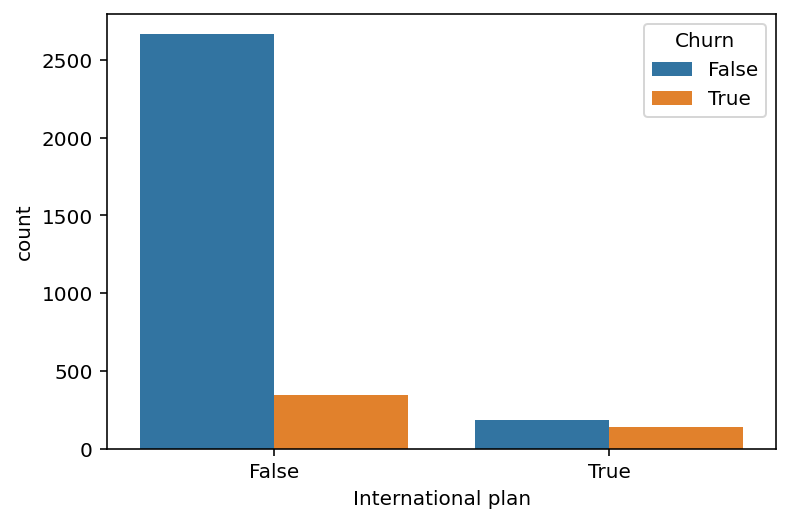

In [56]:
sns.countplot(x="International plan", hue="Churn", data=df);


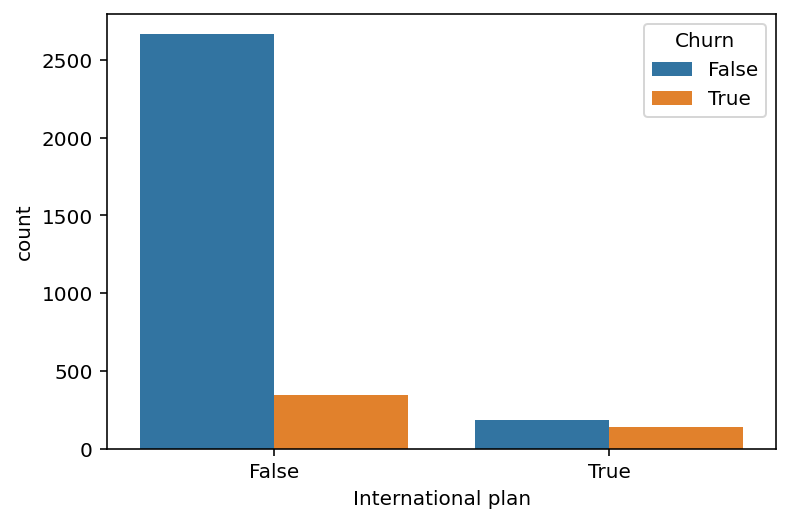

In [57]:
sns.countplot(x="International plan", hue="Churn", data=df);


In [64]:
d=pd.crosstab(df["Churn"],df["Customer service calls"],margins=True)
d

Customer service calls,0,1,2,3,4,...,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,...,8,4,1,0,2850
True,92,122,87,44,76,...,14,5,1,2,483
All,697,1181,759,429,166,...,22,9,2,2,3333


<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

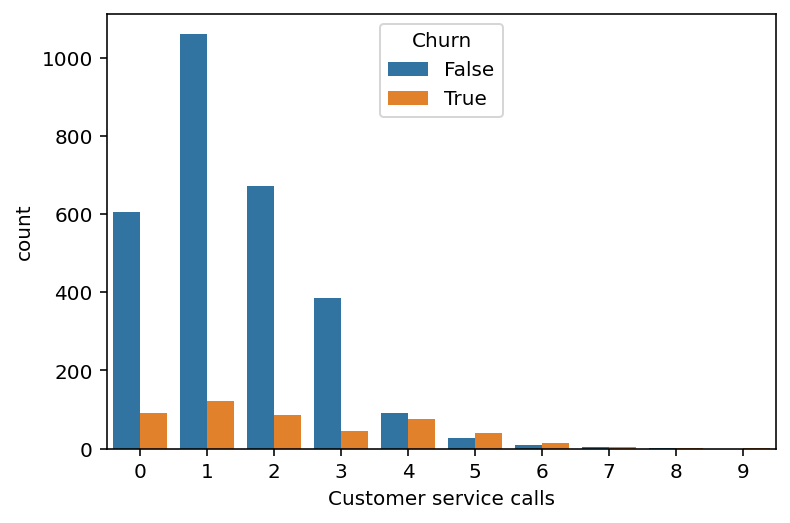

In [68]:
sns.countplot(x="Customer service calls",hue = "Churn",data =df)